# $\color{ForestGreen}{\text{Example: Images of Digits}}$

The second example considers a dataset of $1797$ images of digits (similar to MNIST). Each image is made of $64$ ($8\times 8$) pixels. This dataset is much smaller in size and complexity than MNIST, and can be handled by SVM algorithm. This dataset is built in in the $\textsf{scikit-learn}$ library.

In [1]:
# Importing the libraries that will be used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading the dataset
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
# The data corresponding to a sample image
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

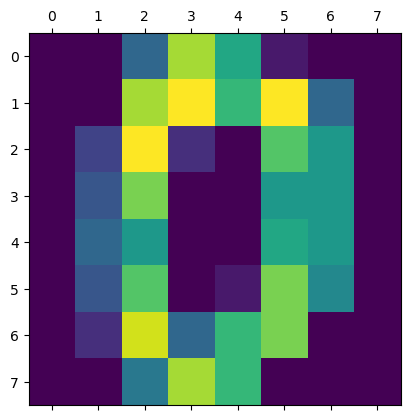

In [4]:
# Displaying the image
plt.matshow(digits.images[0])
plt.show()

In [5]:
# Storing the data in a dataframe

digits_df = pd.DataFrame(digits.data) 
digits_df['Class'] = digits.target

digits_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Class
1674,0.0,0.0,7.0,16.0,16.0,15.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,14.0,1.0,0.0,0.0,0.0,7
48,0.0,0.0,2.0,15.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,12.0,15.0,6.0,0.0,0.0,0
37,0.0,0.0,13.0,10.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,13.0,13.0,15.0,16.0,13.0,0.0,9
1463,0.0,0.0,3.0,12.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,15.0,7.0,0.0,0.0,0
372,0.0,3.0,13.0,16.0,9.0,0.0,0.0,0.0,0.0,10.0,...,1.0,0.0,2.0,16.0,16.0,14.0,12.0,9.0,1.0,2


In [6]:
# To define a binary classification, we define a function to convert the outcomes of 'Class' into two
# outcomes. If class belongs to the set 'dig_set', then the new class is +1. Otherwise it will be -1.

def digitset(df, dig_set):
    df_copy = df.copy()
    df_copy['Class'] = df_copy.Class.apply(lambda x: 1 if x in dig_set else -1)
    return df_copy

In [7]:
# We would like to detect if a digit is a 5 or 6, or something else

df_56 = digitset(digits_df, {5, 6})

df_56.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Class
519,0.0,0.0,1.0,9.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,16.0,15.0,11.0,1.0,-1
685,0.0,0.0,0.0,0.0,8.0,15.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,0.0,-1
1432,0.0,0.0,1.0,9.0,16.0,16.0,16.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,6.0,0.0,0.0,0.0,-1
1484,0.0,1.0,10.0,13.0,9.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,11.0,16.0,16.0,14.0,3.0,0.0,-1
380,0.0,0.0,0.0,6.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,15.0,0.0,0.0,0.0,-1


In [8]:
# Finding the size of each class

print('Number of images of 0 digit =', len(df_56[df_56['Class']==1]),'\n')
print('Number of images of non-0 digit =', len(df_56[df_56['Class']!=1]))

Number of images of 0 digit = 363 

Number of images of non-0 digit = 1434


In [9]:
X = df_56[df_56.columns[:-1]].values    # Defining the features
y = df_56['Class'].values               # Defining the class 


# Splitting to train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [10]:

def svm_clf(X_tr, X_ts, y_tr, y_ts, ker, C, gamma='auto', r=0, deg=1):
    clf = svm.SVC(kernel=ker, gamma=gamma, C=C, coef0=r, degree=deg)
    clf.fit(X_tr, y_tr)              # Fit the train data
    y_tr_pred = clf.predict(X_tr)    # Predict the target for train data
    y_ts_pred = clf.predict(X_ts)    # Predict the target for test data
    tr_score = metrics.accuracy_score(y_tr, y_tr_pred)  # Compute train accuracy
    ts_score = metrics.accuracy_score(y_ts, y_ts_pred)  # Compute test accuracy
    tr_report = classification_report(y_tr, y_tr_pred)  # Generate classification report for train data
    ts_report = classification_report(y_ts, y_ts_pred)  # Generate classification report for test data
    print('Train Classification Report: \n\n', tr_report,'\n\n')
    print('Test Classification Report: \n\n', ts_report)
    return 

In [11]:
# Apply linear SVM with very low budget for margin violation

svm_clf(X_train, X_test, y_train, y_test, ker='linear', C=0.01)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1076
           1       1.00      0.97      0.98       271

    accuracy                           0.99      1347
   macro avg       0.99      0.98      0.99      1347
weighted avg       0.99      0.99      0.99      1347
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       358
           1       0.97      0.95      0.96        92

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



In [12]:
# Apply polynomial SVM (deg=2, r=1) with very low budget for margin violation

svm_clf(X_train, X_test, y_train, y_test, ker='poly', C=0.01, r=1, deg=2)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00       271

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      1.00      0.99       358
           1       0.99      0.96      0.97        92

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.99      0.99      0.99       450



In [13]:
X = digits_df[digits_df.columns[:-1]].values  # Defining the features
y = digits_df['Class'].values                 # Defining the target

# Splitting the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [14]:
# Apply linear kernel with a low budget for margin violation

svm_clf(X_train, X_test, y_train, y_test, ker='linear', C=0.01)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       136
           4       1.00      1.00      1.00       145
           5       1.00      0.99      1.00       127
           6       1.00      1.00      1.00       144
           7       1.00      1.00      1.00       127
           8       0.99      1.00      1.00       133
           9       0.99      0.99      0.99       139

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.96      1.00      0.98        47
           2

In [15]:
# Apply polynomial SVM (deg=2, r=1) with very low budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='poly', C=1, r=1, deg=2)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       136
           4       1.00      1.00      1.00       145
           5       1.00      1.00      1.00       127
           6       1.00      1.00      1.00       144
           7       1.00      1.00      1.00       127
           8       1.00      1.00      1.00       133
           9       1.00      1.00      1.00       139

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.98      1.00      0.99        47
           2

In [16]:
# Specifying the hyperparameters 'C', 'gamma', and 'kernel'
param_grid = {'C': [0.01, 0.1, 1, 10, 100],   
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf']}

# Instantiating 'GridSearchCV'
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 

# Fitting the data
grid.fit(X_train, y_train)

print('\n Best choices for hyperparameters:\n', grid.best_params_) # Presenting best choice

grid_predictions = grid.predict(X_test)  # Compute the predictions of SVM with best choice of hyperparameters

print('\n Test Classification Report:\n\n', classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best choices for hyperparameters:
 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

 Test Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        47
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        47
           4       1.00      1.00      1.00        36
           5       0.96      0.98      0.97        55
           6       1.00      1.00      1.00        37
           7       1.00      0.98      0.99        52
           8       1.00      1.00      1.00        41
           9       0.95      0.98      0.96        41

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [17]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2, 3],
              'coef0': [0, 1, 2]}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 

grid.fit(X_train, y_train)

print('\n Best choices for hyperparameters:\n', grid.best_params_) 

grid_predictions = grid.predict(X_test) 

print('\n Test Classification Report:\n\n', classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 180 candidates, totalling 900 fits

 Best choices for hyperparameters:
 {'C': 1, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

 Test Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        47
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        47
           4       1.00      1.00      1.00        36
           5       0.96      0.98      0.97        55
           6       1.00      0.97      0.99        37
           7       1.00      0.98      0.99        52
           8       0.98      1.00      0.99        41
           9       0.95      0.98      0.96        41

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



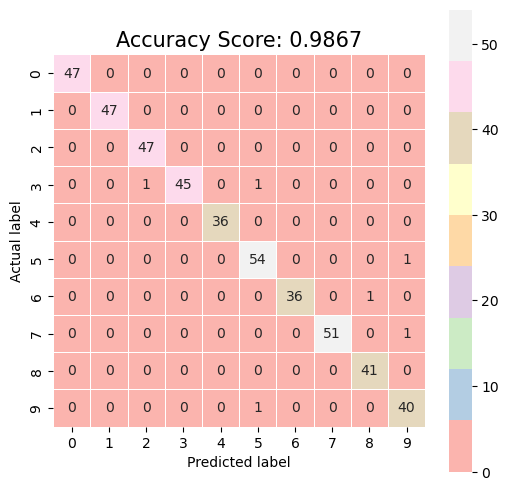

[CV 3/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.108 total time=   0.2s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.974 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.955 total time=   0.1s
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.985 total time=   0.1s
[CV 1/5] END ....C=1, gamma=auto, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END ..C=10, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.993 total time=   0.1s
[CV 3/5] END ...C=10, gamma=auto, kernel=linear;, score=0.981 total time=   0.0s
[CV 4/5] END ...C=10, gamma=auto, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END .C=100, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 4/5] END .C=100, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 2/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.985 total time=   0.1s
[CV 3/5] END ....C=100, gamm

In [19]:
# Running the SVM with best choice of hyperparameters
optimal_clf = svm.SVC(kernel='poly', C=1, gamma='scale', degree=3, coef0=0)
optimal_clf.fit(X_train, y_train)

y_pred = optimal_clf.predict(X_test)

svc_c_matrix = confusion_matrix(y_test, y_pred)
score = metrics.accuracy_score(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(svc_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size = 15);
plt.show()